# Transformers 라이브러리의 pipeline 함수
- Hugging Face Transformers 라이브러리에서 제공하는 고수준 API로, 특정 NLP 작업(예: 텍스트 분류, 번역, 질문 응답 등)을 간단한 코드로 수행할 수 있도록 설계
- 별도의 코드 추가없이 사전 학습된 모델과 토크나이저를 자동으로 로드하며 간단하게 여러가지 태스크에 대하여 추론할 수 있음


## pipeline 함수 내부 동작 과정
- 전처리, 모델 입력, 후처리의 3단계를 순차적으로 수행

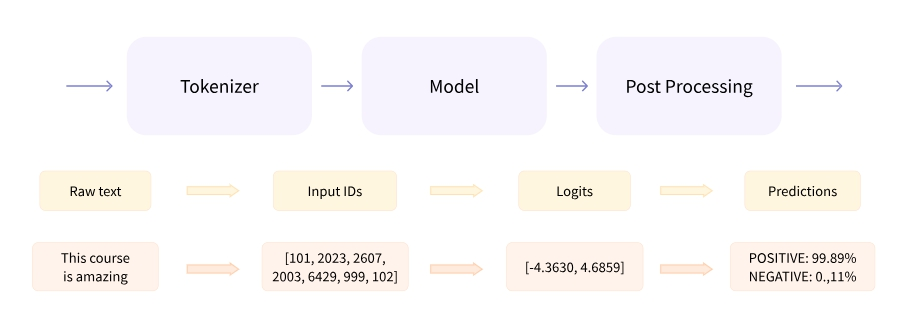

## pipeline 함수 주요 파라미터
- task
    - 첫번째 파라미터로 수행할 NLP 작업의 유형을 지정
- model
    - 두번째 파라미터로 사용할 사전 학습된 모델 ID명 지정
- device
    - 실행할 장치를 지정(기본값: `-1`)
    - `-1`: cpu에서 실행
    - `0`: gpu에서 실행
    - "cpu" 또는 "cuda" 로 전달 가능

# 텍스트 생성
- task: text-generation
- model: skt/kogpt2-base-v2
- 객체 주요 파라미터(`__call__`)
    - max_new_tokens: 입력 값을 제외하고 생성할 최대 토큰
    - num_return_sequences: 생성 결과 반환 개수(기본값 1)

In [1]:
from transformers import pipeline

In [2]:
pl = pipeline("text-generation", "skt/kogpt2-base-v2")

Device set to use cuda:0


In [3]:
pl("딥러닝은 ", num_return_sequences=2, max_new_tokens=100)

[{'generated_text': '딥러닝은 딥러닝 기술이 없어도 딥러닝을 통해 학습하는 수고를 덜어준다.\n학습자들이 특정 문제를 풀더라도 딥러닝을 활용하면 자신이 가지고 있는 학습자의 지문을 분석해 문제를 정확히 파악하게 된다.\n예를 들어 딥러닝 알고리즘이 포함된 문항의 경우 딥러닝의 알고리즘을 활용해 답을 도출하고 문항의 의미를 추론하며 답을 유추하도록 한다.\n예를 들어 딥러닝 알고리즘을 통해 문제의 답을 유추해내도록 지원한 딥러닝 알고'},
 {'generated_text': '딥러닝은 딥러닝 기술에 따른 학습에 대해 학습이 이루어진 결과라고 밝혔다.\n예를 들어 딥러닝을 하게 되면 딥러닝이 가능한 환경에서 학습이 가능해진다.\n또한, 이번 연구의 경우 딥러닝 알고리즘 학습 결과에도 불구하고 딥러닝을 통해 학습을 할 수 있는 가능성을 시사하는 실험이 진행됐다.\n연구진은 "앞으로도 딥러닝 기술을 활용하여 관련 데이터의 신뢰성과 학습이 이루어질 수 있도록 하기 위해 노력하겠다"고 밝혔다.\n이 외에도 연구진은 미래창조과학부'}]

In [4]:
result = pl(["딥러닝은 ", "머신러닝은 "])
result

[[{'generated_text': '딥러닝은 딥러닝 기반의 알고리즘을 기반으로 학습되는 인공지능(AI)의 기술기반 융합 기술이다.\n딥러닝은 데이터에 대한 해석까지 가능해 딥러닝의 알고리즘을 발전시켜 학습자의 학습'}],
 [{'generated_text': '머신러닝은 딥러닝 기반 개인화, 클라우드 기반의 접근이 특징이다.\n김창훈 KT 개인 맞춤형비서사업단 사장은 “KT는 AI 스피커와 음성인식 비서 ‘메가허브’, V'}]]

In [5]:
print(result[0][0]['generated_text'])

딥러닝은 딥러닝 기반의 알고리즘을 기반으로 학습되는 인공지능(AI)의 기술기반 융합 기술이다.
딥러닝은 데이터에 대한 해석까지 가능해 딥러닝의 알고리즘을 발전시켜 학습자의 학습


# 텍스트 분류
- task: text-classification
- model
    - sangrimlee/bert-base-multilingual-cased-nsmc
    - hun3359/klue-bert-base-sentiment

In [4]:
pl = pipeline("text-classification", "sangrimlee/bert-base-multilingual-cased-nsmc")

config.json:   0%|          | 0.00/932 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/712M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/297 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cuda:0


In [5]:
pl("코딩은 어려워")

[{'label': 'negative', 'score': 0.9401563405990601}]

In [6]:
pl("코딩은 재밌다")

[{'label': 'negative', 'score': 0.8652677536010742}]

In [7]:
pl = pipeline("text-classification", "hun3359/klue-bert-base-sentiment")

config.json:   0%|          | 0.00/3.67k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/443M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/367 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/248k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/752k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

Device set to use cuda:0


In [8]:
pl("딥러닝은 재미 있지만, 조금 어렵다.", top_k=10)

[{'label': '조심스러운', 'score': 0.4393012821674347},
 {'label': '혼란스러운', 'score': 0.07023309171199799},
 {'label': '걱정스러운', 'score': 0.06259315460920334},
 {'label': '두려운', 'score': 0.04704178497195244},
 {'label': '취약한', 'score': 0.03882717341184616},
 {'label': '당혹스러운', 'score': 0.03403106704354286},
 {'label': '회의적인', 'score': 0.031164314597845078},
 {'label': '스트레스 받는', 'score': 0.02124611847102642},
 {'label': '불안', 'score': 0.018179884180426598},
 {'label': '혼란스러운(당황한)', 'score': 0.015299106016755104}]

# 마스킹된 단어 채우기
- task: fill-mask
- model: klue/bert-base
    

In [11]:
pl = pipeline("fill-mask", "klue/bert-base")

config.json:   0%|          | 0.00/425 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/445M [00:00<?, ?B/s]

BertForMaskedLM has generative capabilities, as `prepare_inputs_for_generation` is explicitly overwritten. However, it doesn't directly inherit from `GenerationMixin`. From 👉v4.50👈 onwards, `PreTrainedModel` will NOT inherit from `GenerationMixin`, and this model will lose the ability to call `generate` and other related functions.
  - If you're using `trust_remote_code=True`, you can get rid of this warning by loading the model with an auto class. See https://huggingface.co/docs/transformers/en/model_doc/auto#auto-classes
  - If you are the owner of the model architecture code, please modify your model class such that it inherits from `GenerationMixin` (after `PreTrainedModel`, otherwise you'll get an exception).
  - If you are not the owner of the model architecture class, please contact the model code owner to update it.
Some weights of the model checkpoint at klue/bert-base were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.

tokenizer_config.json:   0%|          | 0.00/289 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/248k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/495k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [12]:
pl("인공지능은 [MASK] 입니다.", top_k=1)

[{'score': 0.06748788058757782,
  'token': 5588,
  'token_str': '필수',
  'sequence': '인공지능은 필수 입니다.'}]

# 질문 응답
- 문서에서 주어진 질문에 대한 답을 반환
- task: question-answering
- model: ainize/klue-bert-base-mrc
- 객체 주요 파라미터(`__call__`)
    - question: 질문 내용
    - context: 질문과 연관된 문서

In [13]:
pl = pipeline("question-answering", "ainize/klue-bert-base-mrc")

config.json:   0%|          | 0.00/609 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/440M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/499 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/248k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/495k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [14]:
context = """서울특별시는 대한민국 수도[22]로 최대도시이며, 대한민국 유일의 특별시이다.

법률상 대한민국 제1의 도시로 규정되어 있다.[23] 현재 대한민국에서 유일한 특별시고, 수장인 서울특별시장은 대한민국 광역자치단체장 중 유일하게 장관급 대우를 받으며 국무회의 참여권 및 발언권이 있다.[24][25] 서울특별시는 대한민국 제2의 도시인 부산광역시보다도 인구가 약 3배 더 많은 명실상부한 대한민국 종주도시다.

역사적으로도 백제, 조선, 대한제국의 수도이자 현재 대한민국의 수도로서 중요성이 높다. 기원전 18년 백제가 현 송파구·강동구 지역에 도읍을 정한 후 492년간 한성백제 시대가 이어졌다. 이후 475년 고구려가 한성을 함락했는데, 북쪽에 기반을 둔 국가인 고구려는 기존 백제의 한성에서 북쪽으로 한강을 건너 현 광진구·성동구·구리시 일대를 거점으로 삼아 고구려의 북한산군 남평양으로 지정했고, 이후 서울특별시는 강북 지역을 중심으로 발전했다.

고구려의 영토인 적도 있었으나 이후 백제가 고구려로부터 서울을 다시 되찾았으며, 553년 신라가 나제동맹을 폐기하고 뒤를 쳐 차지하고 이후 신라의 한산주 한양군이 되었다. 이후 고려 시대에는 약 250년간[26] 개경 이남의 남경이었다. 조선 시대에는 510년 동안[27] 조선 및 대한제국의 수도 한성부였고, 이어 70여년간[28] 대한민국 수도인 서울특별시로서 지위를 차지하는 도시로 한국사에서 도합 1,070여 년간 수도로서 기능을 했고 부수도 기간까지 합치면 1,300년이 넘는 유구한 역사의 고도다.

전통적으로 서울은 강북 지역만으로 구성되어 있었으나, 1960년대 서울 대확장을 통해 한강 이남까지 관할구역이 확장되었다. 현재의 서울특별시 영역은 옛 한성부 영역에서 조선 후기의 양천현 전체와 시흥현, 과천현의 상당 지역, 광주유수부와, 양주목의 일부를 추가로 편입한 형태이다. 오랜 역사를 가지고 있는 도시인 만큼 평지에 일목요연하게 설립된 계획도시가 아니라 산과 강 등의 자연을 등지고 자연스레 형성된 도시 형태이며, 독특한 특징도 여럿 있다."""

In [15]:
pl(question="조선의 수도는?", context=context)

{'score': 0.6749787926673889, 'start': 645, 'end': 650, 'answer': '한성부였고'}

# 텍스트 요약
- task: summarization
- model: EbanLee/kobart-summary-v3

In [16]:
pl = pipeline("summarization", "EbanLee/kobart-summary-v3")

config.json:   0%|          | 0.00/1.68k [00:00<?, ?B/s]

You passed along `num_labels=3` with an incompatible id to label map: {'0': 'NEGATIVE', '1': 'POSITIVE'}. The number of labels wil be overwritten to 2.


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

You passed along `num_labels=3` with an incompatible id to label map: {'0': 'NEGATIVE', '1': 'POSITIVE'}. The number of labels wil be overwritten to 2.


model.safetensors:   0%|          | 0.00/496M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/191 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/39.5k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/692 [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [17]:
result = pl(context)
result

[{'summary_text': '서울특별시는 대한민국 제1의 도시로 규정되어 있으며 수장인 서울특별시장은 대한민국 광역자치단체장 중 유일하게 장관급 대우를 받으며 국무회의 참여권 및 발언권이 있다. 역사적으로도 백제, 조선, 대한제국의 수도이자 현재 대한민국의 수도로서 중요성이 높다. 전통적으로 서울은 강북 지역만으로 구성되어 있었으나, 1960년대 서울 대확장을 통해 한강 이남까지 관할구역이 확장되었다. 현재의 서울특별시 영역은 옛 한성부 영역에서 조선 후기의 양천현 전체와 시흥현, 과천현의 상당 지역, 광주유수부와, 양주목의 일부를 추가로 편입한 형태이다.'}]

In [18]:
print(result[0]["summary_text"])

서울특별시는 대한민국 제1의 도시로 규정되어 있으며 수장인 서울특별시장은 대한민국 광역자치단체장 중 유일하게 장관급 대우를 받으며 국무회의 참여권 및 발언권이 있다. 역사적으로도 백제, 조선, 대한제국의 수도이자 현재 대한민국의 수도로서 중요성이 높다. 전통적으로 서울은 강북 지역만으로 구성되어 있었으나, 1960년대 서울 대확장을 통해 한강 이남까지 관할구역이 확장되었다. 현재의 서울특별시 영역은 옛 한성부 영역에서 조선 후기의 양천현 전체와 시흥현, 과천현의 상당 지역, 광주유수부와, 양주목의 일부를 추가로 편입한 형태이다.


# Text-to-Text 생성
- task: text2text-generation
- model: heegyu/kobart-text-style-transfer

In [19]:
pl = pipeline("text2text-generation", "heegyu/kobart-text-style-transfer")

config.json:   0%|          | 0.00/1.45k [00:00<?, ?B/s]

You passed along `num_labels=3` with an incompatible id to label map: {'0': 'NEGATIVE', '1': 'POSITIVE'}. The number of labels wil be overwritten to 2.
You passed along `num_labels=3` with an incompatible id to label map: {'0': 'NEGATIVE', '1': 'POSITIVE'}. The number of labels wil be overwritten to 2.


pytorch_model.bin:   0%|          | 0.00/496M [00:00<?, ?B/s]

You passed along `num_labels=3` with an incompatible id to label map: {'0': 'NEGATIVE', '1': 'POSITIVE'}. The number of labels wil be overwritten to 2.


tokenizer.json:   0%|          | 0.00/682k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/4.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

You passed along `num_labels=3` with an incompatible id to label map: {'0': 'NEGATIVE', '1': 'POSITIVE'}. The number of labels wil be overwritten to 2.
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [20]:
text = "밥 먹자"

In [21]:
pl(f"문어체 말투로 변환:{text}")

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1375: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


[{'generated_text': '밥 드 드시죠.'}]

In [22]:
pl(f"아재 말투로 변환:{text}")

[{'generated_text': '밥 먹자~'}]

In [23]:
pl(f"왕 말투로 변환:{text}")

[{'generated_text': '밥 먹 먹도록 하오.'}]

In [24]:
pl(f"이모티콘 말투로 변환:{text}")

[{'generated_text': '밥 먹자! ( ́`)'}]

# 토큰 분류
- task: token-classification
- model: wisejiyoon/bert-finetuned-ner-ko

In [25]:
pl = pipeline("token-classification", "wisejiyoon/bert-finetuned-ner-ko")

config.json:   0%|          | 0.00/1.02k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/496M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/440M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/503 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/248k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/752k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [26]:
pl("제 이름은 권지혁이고, 대한민국 사람입니다. 현재 시각은 2시 46분 입니다.")

[{'entity': 'B-PS',
  'score': 0.9987172,
  'index': 4,
  'word': '권',
  'start': 6,
  'end': 7},
 {'entity': 'I-PS',
  'score': 0.99913186,
  'index': 5,
  'word': '##지',
  'start': 7,
  'end': 8},
 {'entity': 'I-PS',
  'score': 0.99889046,
  'index': 6,
  'word': '##혁',
  'start': 8,
  'end': 9},
 {'entity': 'B-LC',
  'score': 0.9988702,
  'index': 10,
  'word': '대한민국',
  'start': 13,
  'end': 17},
 {'entity': 'B-TI',
  'score': 0.99836725,
  'index': 17,
  'word': '2',
  'start': 32,
  'end': 33},
 {'entity': 'I-TI',
  'score': 0.99799407,
  'index': 18,
  'word': '##시',
  'start': 33,
  'end': 34},
 {'entity': 'I-TI',
  'score': 0.9988171,
  'index': 19,
  'word': '46',
  'start': 35,
  'end': 37},
 {'entity': 'I-TI',
  'score': 0.9985507,
  'index': 20,
  'word': '##분',
  'start': 37,
  'end': 38}]

# 번역
- task: translation
- model: Helsinki-NLP/opus-mt-ko-en

In [27]:
pl = pipeline("translation", "Helsinki-NLP/opus-mt-ko-en")

config.json:   0%|          | 0.00/1.39k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/312M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/44.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/842k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/813k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.72M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [28]:
pl("꿈같은 얘기네요.")

[{'translation_text': "That's a dream."}]

# 테이블 형식의 데이터에 대한 질문 응답
- task: table-question-answering
- model: ohsuz/koreapas-finetuned-korwikitq
- 객체 주요 파라미터(`__call__`)
    - table: DataFrame or dict
    - query: 질문

In [29]:
pl = pipeline("table-question-answering", "ohsuz/koreapas-finetuned-korwikitq")

config.json:   0%|          | 0.00/1.37k [00:00<?, ?B/s]

TAPAS models are not usable since `tensorflow_probability` can't be loaded. It seems you have `tensorflow_probability` installed with the wrong tensorflow version. Please try to reinstall it following the instructions here: https://github.com/tensorflow/probability.


pytorch_model.bin:   0%|          | 0.00/447M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/980 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/248k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/18.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/154 [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [30]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [31]:
import pandas as pd

DATA_PATH = "/content/drive/MyDrive/ms_3rd/data/"
df = pd.read_csv(f"{DATA_PATH}insurance_train.csv")
df_tmp = df.astype(str).head(50)
df_tmp

,age,sex,bmi,children,smoker,region,target
0,37,male,36.19,0,no,southeast,19214.70553
1,18,male,29.37,1,no,southeast,1719.4363
2,28,male,26.98,2,no,northeast,4435.0942
3,47,male,36.2,1,no,southwest,8068.185
4,32,male,27.835,1,no,northwest,4454.40265
5,55,male,38.28,0,no,southeast,10226.2842
6,58,female,27.17,0,no,northwest,12222.8983
7,64,male,33.88,0,yes,southeast,46889.2612
8,51,male,27.74,1,no,northeast,9957.7216
9,36,male,33.82,1,no,northwest,5377.4578


In [32]:
pl(table=df_tmp, query="average of bmi")

/usr/local/lib/python3.10/dist-packages/transformers/models/tapas/tokenization_tapas.py:2699: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  text = normalize_for_match(row[col_index].text)
/usr/local/lib/python3.10/dist-packages/transformers/models/tapas/tokenization_tapas.py:1493: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cell = row[col_index]


{'answer': '22.8', 'coordinates': [(36, 2)], 'cells': ['22.8']}

# 훈련되지 않은 새로운 데이터에 대해 분류
- task: zero-shot-classification
- model: pongjin/roberta_with_kornli

In [33]:
pl = pipeline("zero-shot-classification", "pongjin/roberta_with_kornli")

config.json:   0%|          | 0.00/985 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/443M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/415 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/248k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/752k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/173 [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [34]:
pl(
    sequences="오늘 진짜 열심히 했는데 성과가 별로야",
    candidate_labels=["즐거움", "기쁨", "슬픔", "분노"]
)

{'sequence': '오늘 진짜 열심히 했는데 성과가 별로야',
 'labels': ['슬픔', '기쁨', '분노', '즐거움'],
 'scores': [0.7991641759872437,
  0.07615870982408524,
  0.07201287895441055,
  0.052664268761873245]}

In [35]:
params = {
    "sequences": ["세상엔 똑똑한 사람이 너무 많다.", "나는 왜 이럴까"],
    "candidate_labels": ["즐거움", "기쁨", "슬픔", "분노", "무기력"],
}
pl(**params)

[{'sequence': '세상엔 똑똑한 사람이 너무 많다.',
  'labels': ['기쁨', '즐거움', '슬픔', '분노', '무기력'],
  'scores': [0.5924018621444702,
   0.2990570366382599,
   0.038780394941568375,
   0.035781897604465485,
   0.03397887200117111]},
 {'sequence': '나는 왜 이럴까',
  'labels': ['즐거움', '기쁨', '분노', '슬픔', '무기력'],
  'scores': [0.3007582128047943,
   0.22571614384651184,
   0.18212324380874634,
   0.17376534640789032,
   0.1176370233297348]}]

In [36]:
df = pd.read_csv(f"{DATA_PATH}review_train.csv")
df.head()

,id,review,target
0,train_0,이런 최고의 영화를 이제서야 보다니,1
1,train_1,안봤지만 유승준나와서 비추.,0
2,train_2,시대를 못 따라간 연출과 촌스러운 영상미.,0
3,train_3,원소전 굿,1
4,train_4,ㅋㅋㅋㅋ 개봉영화평점단사람이1명 ㅋㅋㅋㅋ,1


In [38]:
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"

In [55]:
pl = pipeline("text-classification", "sangrimlee/bert-base-multilingual-cased-nsmc", device=device)
pl(["힘들다", "좋다"])

[{'label': 'negative', 'score': 0.9976658821105957},
 {'label': 'positive', 'score': 0.9918829202651978}]

In [51]:
pred = pl(df["review"].tolist())

In [52]:
pred = [int(item["label"] == "positive") for item in pred]

In [53]:
from sklearn.metrics import accuracy_score

accuracy_score(df["target"], pred)

0.9125

In [57]:
pl = pipeline("zero-shot-classification", "pongjin/roberta_with_kornli", device=device)

In [58]:
pl(sequences=["힘들다", "좋다"], candidate_labels=["부정", "긍정"])

[{'sequence': '힘들다',
  'labels': ['부정', '긍정'],
  'scores': [0.8949085474014282, 0.10509141534566879]},
 {'sequence': '좋다',
  'labels': ['긍정', '부정'],
  'scores': [0.9851254224777222, 0.014874509535729885]}]

In [61]:
pred = pl(sequences=df["review"].tolist(), candidate_labels=["부정", "긍정"])

In [70]:
pred = [int(item['labels'][0] == "긍정") for item in pred]

In [71]:
accuracy_score(df["target"], pred)

0.736